In [1]:
import sys
sys.path.append("..")


from libs.data_manipulation import *
from libs.dim_reduction import *
from libs.feature_generation import *
from libs.clustering import *
from libs.convex_hull import *
from libs.alpha_shape import *
from libs.weight_generator import *

In [2]:
england_df = compile_team_tracking_data("../data/H_EURO2024GERMANY", "England")
england_df = extract_one_match(england_df).iloc[::48]

In [3]:
print(england_df)

        match_id  Time [s]  Time [s]_team half_team  minute_team  Period_team  \
0              1      0.00           0.00        1H            0            1   
48             1      1.92           1.92        1H            0            1   
96             1      3.84           3.84        1H            0            1   
144            1      5.76           5.76        1H            0            1   
192            1      7.68           7.68        1H            0            1   
...          ...       ...            ...       ...          ...          ...   
141168         1   5579.08        5579.08        2H           92            2   
141216         1   5581.00        5581.00        2H           93            2   
141264         1   5582.92        5582.92        2H           93            2   
141312         1   5584.84        5584.84        2H           93            2   
141360         1   5586.76        5586.76        2H           93            2   

         home_6_x   home_6_

In [4]:
inverse_distance_list = calculate_weights(england_df, fun= lambda x: 1/x) #Inverse proportionality to distance
linear_distance_list = calculate_weights(england_df, fun= lambda x: 200 - x, normalizing_factor=2200, max_val=200) #Linear weigh based upon distance
exp_pow_neg_dist_list = calculate_weights(england_df, fun= lambda x: np.exp(-x/20)) #Linear weigh based upon distance

199.4255137862599
191.016734915674
190.7159246457425
194.44988773294548
198.16261821671577
196.73799636716194
191.30578549077168
195.93307882039994
197.11645014017216
195.49017421404497
193.98015886146956
196.8614458618913
192.35569294654692
198.54121730556685
196.92795346936222
197.61034977000037
192.62931194720807
197.40422722204053
191.37890342044665
192.9565980982633
192.7775202746665
195.06838202981453
190.57788963989753
195.00926830090435
195.0750653612135
195.6455122816771
192.03030758799068
199.51114590360245
191.308564263378
199.62293053845315
199.63838882589516
191.93211269570182
191.1073734382101
194.7222217902111
199.64414940776126
192.4565704345146
199.68743188519304
194.41801995740943
194.5637450990862
198.94156267922136
199.48557596678117
199.46011706200647
199.34937114825192
194.00728772340324
195.1607935125081
199.34939328346454
192.8528045074993
191.0501625856018
195.90137189920256
199.16096359888076
194.84255654842295
190.7027929204066
198.4236550502922
191.465765710

In [5]:
inverse_distance_flat =  [x for xs in inverse_distance_list for x in xs[:-1]]
linear_distance_flat =  [x for xs in linear_distance_list for x in xs[:-1]]
exp_pow_neg_dist_flat =  [x for xs in exp_pow_neg_dist_list for x in xs[:-1]]

In [6]:

inverse_distance_flat_np = np.array(inverse_distance_flat)
linear_distance_flat_np = np.array(linear_distance_flat)
exp_pow_neg_dist_flat_np = np.array(exp_pow_neg_dist_flat)




inverse_distance_flat_np = inverse_distance_flat_np[~np.isnan(inverse_distance_flat_np)]
linear_distance_flat_np = linear_distance_flat_np[~np.isnan(linear_distance_flat_np)]
exp_pow_neg_dist_flat_np = exp_pow_neg_dist_flat_np[~np.isnan(exp_pow_neg_dist_flat_np)]



0.09090909090909091


(array([4.300e+01, 3.361e+03, 7.846e+03, 5.421e+03, 3.450e+03, 2.293e+03,
        1.558e+03, 1.146e+03, 8.740e+02, 6.150e+02, 5.200e+02, 3.610e+02,
        2.950e+02, 2.860e+02, 1.830e+02, 1.600e+02, 1.580e+02, 1.130e+02,
        1.210e+02, 8.600e+01, 7.100e+01, 8.200e+01, 6.000e+01, 5.600e+01,
        6.300e+01, 4.400e+01, 4.100e+01, 4.200e+01, 3.600e+01, 4.600e+01,
        2.800e+01, 3.000e+01, 2.700e+01, 2.200e+01, 1.400e+01, 2.200e+01,
        2.100e+01, 3.100e+01, 9.000e+00, 2.100e+01, 1.600e+01, 2.000e+01,
        1.400e+01, 9.000e+00, 1.000e+01, 1.000e+01, 6.000e+00, 1.200e+01,
        1.400e+01, 1.100e+01, 9.000e+00, 1.000e+01, 1.300e+01, 1.200e+01,
        8.000e+00, 1.100e+01, 1.000e+01, 1.000e+01, 8.000e+00, 7.000e+00,
        1.200e+01, 1.600e+01, 6.000e+00, 9.000e+00, 7.000e+00, 4.000e+00,
        7.000e+00, 1.000e+01, 3.000e+00, 7.000e+00, 8.000e+00, 6.000e+00,
        7.000e+00, 9.000e+00, 9.000e+00, 9.000e+00, 8.000e+00, 7.000e+00,
        7.000e+00, 3.000e+00, 1.100e+0

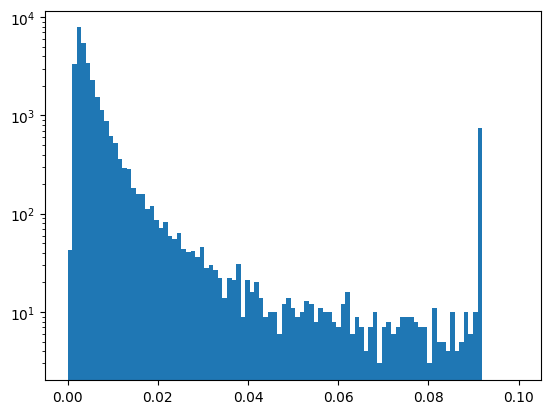

In [7]:
plt.yscale('log')
print(np.max(inverse_distance_flat_np))
plt.hist(inverse_distance_flat_np, bins =np.linspace(0, 0.1, num= 100))

0.09087744425343186


(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 5.000e+00,
        5.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 5.000e+00,
        4.000e+00, 2.000e+00, 5.000e+00, 9.000e+00, 5.000e+00, 1.900e+01,
        1.200e+01, 1.500e+01, 1.400e+0

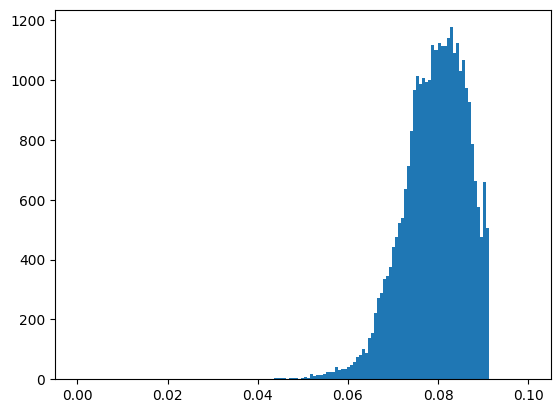

In [8]:

print(np.max(linear_distance_flat_np))
plt.hist(linear_distance_flat_np, bins =np.linspace(0, 0.1, num= 150))


0.09059317454483241


(array([ 43., 139., 183., 224., 289., 425., 576., 604., 595., 653., 677.,
        649., 701., 758., 809., 834., 825., 790., 713., 705., 669., 606.,
        600., 626., 636., 588., 541., 529., 579., 503., 502., 469., 493.,
        432., 415., 477., 429., 425., 415., 375., 368., 364., 346., 363.,
        316., 332., 284., 286., 314., 274., 276., 298., 250., 242., 250.,
        228., 230., 224., 210., 205., 185., 161., 174., 165., 173., 154.,
        129., 122., 134., 114., 128., 101., 100.,  99., 101.,  90.,  89.,
         87.,  76.,  83.,  77.,  57.,  74.,  93.,  97., 130., 192., 254.,
        179.,  74.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.        , 0.0010101 , 0.0020202 , 0.0030303 , 0.0040404 ,
        0.00505051, 0.00606061, 0.00707071, 0.00808081, 0.00909091,
        0.01010101, 0.01111111, 0.01212121, 0.01313131, 0.01414141,
        0.01515152, 0.01616162, 0.01717172, 0.01818182, 0.01919192,
        0.02020202, 0.02121212, 0.02222222, 0.02323232, 0.02

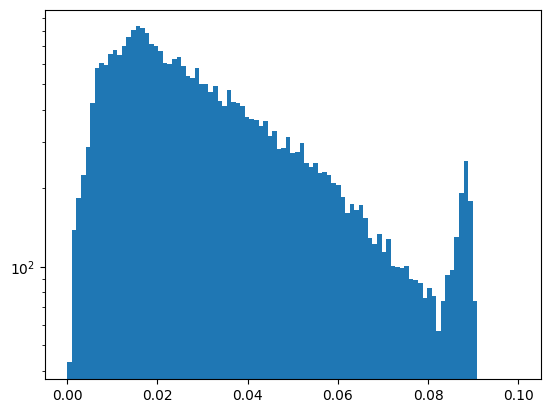

In [9]:
plt.yscale('log')
print(np.max(exp_pow_neg_dist_flat_np))
plt.hist(exp_pow_neg_dist_flat_np, bins =np.linspace(0, 0.1, num= 100))